In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import mat plotlib.pyplot as plt


In [12]:

import pandas as pd

# Load the training and test data files
train_df = pd.read_csv('/Users/sana/Documents/GitHub/habita-wise/habitawise_dataset/train (1).csv')
test_df = pd.read_csv('/Users/sana/Documents/GitHub/habita-wise/habitawise_dataset/test (1).csv')



# Display the first few rows of each dataframe to understand their structure and contents
train_df.head(5), test_df.head(5)


(       Id Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
 0  0x21e3     Apartment            106                NaN                1   
 1  0x68d4     Apartment            733                2.0                2   
 2  0x7d81     Apartment            737                4.0                2   
 3  0x7a57     Apartment            900                3.0                2   
 4  0x9409      Bungalow           2238               14.0                6   
 
         Furnishing  Frequency_of_Powercuts Power_Backup  \
 0   Semi_Furnished                     0.0           No   
 1      Unfurnished                     1.0           No   
 2  Fully Furnished                     0.0           No   
 3      Unfurnished                     2.0          Yes   
 4  Fully Furnished                     0.0           No   
 
               Water_Supply  Traffic_Density_Score              Crime_Rate  \
 0  Once in a day - Morning                   5.89  Slightly below average   
 1  On

In [13]:
print(train_df.shape)
print(test_df.shape)


(31599, 15)
(7900, 14)


In [15]:
# Summary statistics and missing values check for the training data
train_summary = train_df.describe(include='all')
train_missing_values = train_df.isnull().sum()

# Check for unique values in categorical columns
categorical_columns = train_df.select_dtypes(include='object').columns
unique_values_categorical = {col: train_df[col].nunique() for col in categorical_columns}

# Show results for summary, missing values, and unique categorical values
train_summary, train_missing_values, unique_values_categorical


(            Id Property_Type  Property_Area  Number_of_Windows  \
 count    31599         31599   31599.000000       30266.000000   
 unique   31599             6            NaN                NaN   
 top     0x21e3     Apartment            NaN                NaN   
 freq         1         11673            NaN                NaN   
 mean       NaN           NaN    1392.563784           3.926254   
 std        NaN           NaN    1950.693832           2.694485   
 min        NaN           NaN     100.000000           0.000000   
 25%        NaN           NaN     495.000000           2.000000   
 50%        NaN           NaN     932.000000           4.000000   
 75%        NaN           NaN    1767.000000           5.000000   
 max        NaN           NaN   28064.000000          15.000000   
 
         Number_of_Doors      Furnishing  Frequency_of_Powercuts Power_Backup  \
 count      31599.000000           30771            30490.000000        31599   
 unique              NaN        

**Missing Values:**

- There are some missing values in critical columns:
- Number_of_Windows has 1,333 missing values.
- Furnishing has 828 missing values.
- Frequency_of_Powercuts has 1,109 missing values.
- Crime_Rate has 629 missing values.
- Dust_and_Noise has 999 missing values.


**Numerical Features:**

- The Property_Area ranges widely from 100 to 28,064 square feet, with an average around 1,393.
- Air_Quality_Index varies from 0 to 1,044, suggesting that some locations experience extreme air quality issues.
- Target Variable (Habitability_Score):

- The habitability score has a broad range, from 7.28 to 100, with an average of around 73.4.


**Categorical Features:**

- Property_Type has six unique values.
- Furnishing has three categories (Unfurnished, Semi_Furnished, Fully Furnished).
- Power_Backup is binary (Yes/No).
- Water_Supply has five categories, while Crime_Rate has four and - Dust_and_Noise has three.


## Data Cleaning

In [25]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 11.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:

from sklearn.impute import SimpleImputer

# Copy of the dataframe for cleaning
cleaned_train_df = train_df.copy()

# Impute missing values in numerical columns with the median
numerical_columns = ['Number_of_Windows', 'Frequency_of_Powercuts']
numerical_imputer = SimpleImputer(strategy='median')
cleaned_train_df[numerical_columns] = numerical_imputer.fit_transform(cleaned_train_df[numerical_columns])

# Impute missing values in categorical columns with the most frequent value
categorical_columns = ['Furnishing', 'Crime_Rate', 'Dust_and_Noise']
categorical_imputer = SimpleImputer(strategy='most_frequent')
cleaned_train_df[categorical_columns] = categorical_imputer.fit_transform(cleaned_train_df[categorical_columns])

# Check for remaining missing values after imputation
remaining_missing_values = cleaned_train_df.isnull().sum()
remaining_missing_values


Id                        0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

All missing values have been successfully imputed:

Numerical columns like Number_of_Windows and Frequency_of_Powercuts were filled with the median.
Categorical columns (Furnishing, Crime_Rate, and Dust_and_Noise) were filled with the most frequent category.

## Feature Encoding 

In [27]:
from sklearn.preprocessing import LabelEncoder

# Copy of the cleaned dataframe for encoding
encoded_train_df = cleaned_train_df.copy()

# Encoding categorical variables with label encoding for simplicity (since there are few unique categories per feature)
label_encoders = {}
categorical_features = ['Property_Type', 'Furnishing', 'Power_Backup', 'Water_Supply', 'Crime_Rate', 'Dust_and_Noise']

# Apply label encoding to each categorical feature and store the encoders for potential reverse transformation
for feature in categorical_features:
    le = LabelEncoder()
    encoded_train_df[feature] = le.fit_transform(encoded_train_df[feature])
    label_encoders[feature] = le

# Display the first few rows to show encoded categorical variables
encoded_train_df.head()


,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,1,106,4.0,1,1,0.0,1,3,5.89,1,2,90,3.86,71.98
1,0x68d4,1,733,2.0,2,2,1.0,1,2,4.37,3,2,96,3.55,71.20
2,0x7d81,1,737,4.0,2,0,0.0,1,3,7.45,1,2,121,3.81,71.39
3,0x7a57,1,900,3.0,2,2,2.0,2,3,6.16,2,2,100,1.34,31.46
4,0x9409,2,2238,14.0,6,0,0.0,1,0,5.46,3,2,116,4.77,93.70


The categorical features have been successfully encoded with label encoding, transforming each category into a unique integer. This approach is suitable here due to the limited number of unique values per feature

### Feature Scaling

We will now do feature scaling, the numerical features have been scaled using standardization (mean of 0 and standard deviation of 1), making them suitable for most machine learning models. This transformation ensures that each numerical feature contributes proportionately.

In [28]:
from sklearn.preprocessing import StandardScaler

# Define numerical features for scaling, excluding the target variable and ID
numerical_features = [
    'Property_Area', 'Number_of_Windows', 'Number_of_Doors', 
    'Frequency_of_Powercuts', 'Traffic_Density_Score', 
    'Air_Quality_Index', 'Neighborhood_Review'
]

# Apply StandardScaler to the numerical features for normalization
scaler = StandardScaler()
encoded_train_df[numerical_features] = scaler.fit_transform(encoded_train_df[numerical_features])

# Display the first few rows to show scaled numerical features
encoded_train_df.head()


,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,1,-0.659552,0.026786,-1.131916,1,-0.628474,1,3,-0.382854,1,2,-0.505529,0.158931,71.98
1,0x68d4,1,-0.338123,-0.731641,-0.283241,2,0.709834,1,2,-1.629394,3,2,-0.408865,-0.229401,71.20
2,0x7d81,1,-0.336072,0.026786,-0.283241,0,-0.628474,1,3,0.896489,1,2,-0.006099,0.096297,71.39
3,0x7a57,1,-0.252511,-0.352428,-0.283241,2,2.048141,2,3,-0.161430,2,2,-0.344423,-2.997826,31.46
4,0x9409,2,0.433410,3.818920,3.111459,0,-0.628474,1,0,-0.735494,3,2,-0.086652,1.298870,93.70


## Correlation for feature selction 

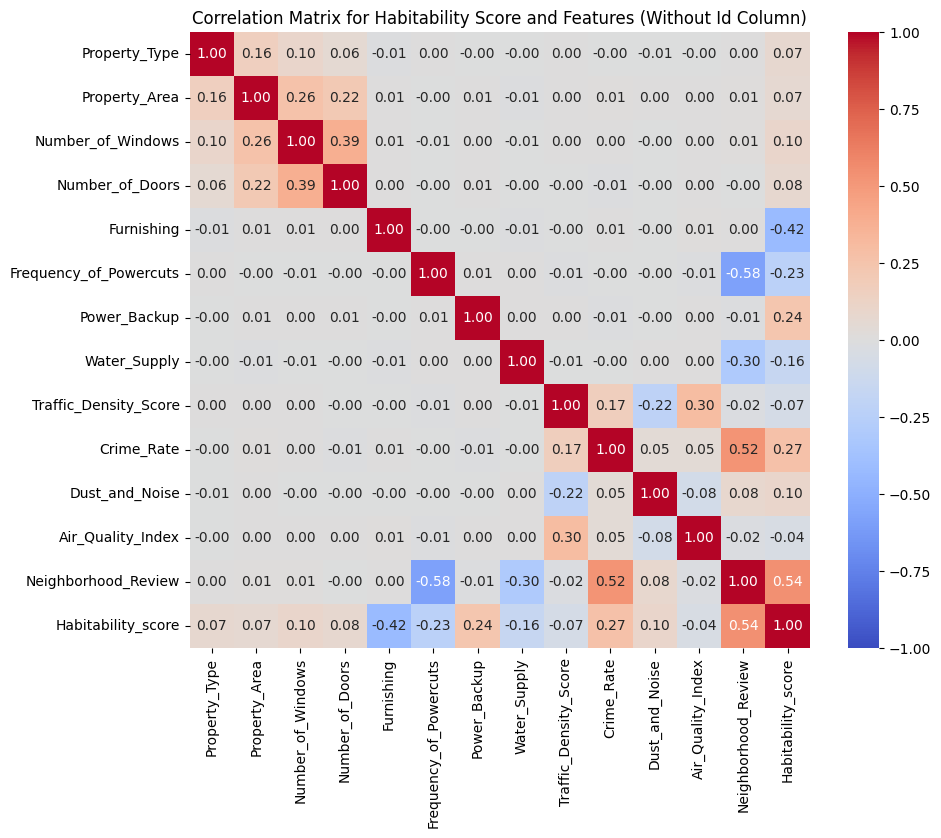

Habitability_score        1.000000
Neighborhood_Review       0.540748
Crime_Rate                0.272803
Power_Backup              0.241286
Dust_and_Noise            0.098129
Number_of_Windows         0.096664
Number_of_Doors           0.075017
Property_Type             0.072896
Property_Area             0.066577
Air_Quality_Index        -0.041843
Traffic_Density_Score    -0.066861
Water_Supply             -0.158580
Frequency_of_Powercuts   -0.232064
Furnishing               -0.422399
Name: Habitability_score, dtype: float64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'Id' column and re-calculate the correlation matrix
encoded_train_df_no_id = encoded_train_df.drop(columns=['Id'])
correlation_matrix_no_id = encoded_train_df_no_id.corr()

# Plot the updated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_no_id, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix for Habitability Score and Features (Without Id Column)")
plt.show()

# Display the correlations of each feature with Habitability_score again
habitability_corr_no_id = correlation_matrix_no_id['Habitability_score'].sort_values(ascending=False)
habitability_corr_no_id



In [31]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define features and target variable
X = encoded_train_df_no_id.drop(columns=['Habitability_score'])
y = encoded_train_df_no_id['Habitability_score']

# Initialize and train a Random Forest Regressor to evaluate feature importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Get feature importances from the model and sort them
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns[sorted_indices],
    'Importance': feature_importances[sorted_indices]
})

# Display feature importances
feature_importance_df


,Feature,Importance
0,Neighborhood_Review,0.381230
1,Furnishing,0.256484
2,Power_Backup,0.120821
3,Property_Area,0.091241
4,Traffic_Density_Score,0.040876
5,Air_Quality_Index,0.030094
6,Frequency_of_Powercuts,0.023183
7,Number_of_Windows,0.020213
8,Number_of_Doors,0.010634
9,Water_Supply,0.006647


The feature importance analysis with a Random Forest Regressor reveals the following key insights:

Top Features:

Neighborhood_Review (0.38) and Furnishing (0.26) have the highest importance scores, making them significant predictors for the Habitability Score.
Power_Backup (0.12) and Property_Area (0.09) also contribute meaningfully.
Low Importance Features:

Features like Crime_Rate, Property_Type, Dust_and_Noise, and Water_Supply have very low importance scores, suggesting they could be candidates for removal without significantly impacting model performance.
Based on this, it may be effective to retain the top features and consider dropping or consolidating the less important ones. Let me know if you'd like assistance in refining the feature set based on this analysis or moving forward with model training

## Training the Model 

### Random Forest Regressor 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select top features based on previous analysis
top_features = ['Neighborhood_Review', 'Furnishing', 'Power_Backup', 'Property_Area']
X_top = encoded_train_df_no_id[top_features]
y = encoded_train_df_no_id['Habitability_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor on the top features
rf_model_top = RandomForestRegressor(random_state=42)
rf_model_top.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model_top.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(51.21148000810375, 0.7306818779182319)

### Linear Regression 

In [34]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training set
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model's performance using MSE and R² Score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear

# Train the Linear Regression model on the training set
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model's performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear


(89.99238930283681, 0.5267353865801929)

### Support Vector Regressor Model 

In [35]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor with default parameters
svr_model = SVR()

# Train the SVR model on the training set
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model's performance using MSE and R² Score
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_svr, r2_svr


(51.906539749958526, 0.7270266001488461)

### Gradient Boosting Regressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor with default parameters
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting Regressor on the training set
gbr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the model's performance using MSE and R² Score
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

mse_gbr, r2_gbr


(51.30225885888661, 0.7302044773507477)

### KNN

In [37]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the K-Nearest Neighbors Regressor with a default value of 5 neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the KNN Regressor on the training set
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model's performance using MSE and R² Score
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_knn, r2_knn


(49.23738221329114, 0.7410635406005165)

In [38]:
cd /path/to/habita-wise

[Errno 2] No such file or directory: '/path/to/habita-wise'
/Users/sana/Documents/GitHub/habita-wise


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
